### Regression Using Least Squares

1. Generate 50 2D-data points using any random function with Gaussian random noise to the data.
2. Fit the generated noisy data using the least squares method based on a polynomial function.
     1. $\bar{w} = \left( X^T X \right)^{-1} X^T \bar{t} $
     2.  $\bar{w} =  X^+ \bar{t} $ or using numpy's pinv function
4. Show the original against fitted plot, along with error value, E(w), and estimated values of w
5. Some experimentation of changing the degree M to explore cases of underfitting and overfitting, and how they relate to the error value, E(w) 
6. Some experimentation with noise levels


In [5]:
# Importing libraries and functions

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy import linalg

# Function for graph generation and noise adding
def generate_graph(rng, intv, pwr, lst):
    x = np.arange(0, rng, intv)
    y = 0
    for i in range(pwr):
        term = lst[i]
        y += term*np.power(x, i)
    return x,y

def add_noise(sigma, y_curve):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

# Selected a random graph
actual_distribution = generate_graph(9, 0.5, 4, [-10.61, 16.78, -5.607, 0.4345])
X = actual_distribution[0]
Y = actual_distribution[1]
Y_noise = add_noise(4.0, actual_distribution[1])

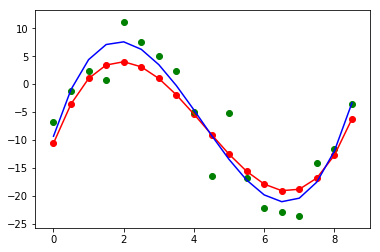

In [6]:
# Fitting a regression curve

# Matrix Calculations
X_list = X.tolist()
X_matrix_T_list = []

for i in range(4):
    for j in X_list:
        X_matrix_T_list.append(j**i)

X_matrix_T = np.array(X_matrix_T_list).reshape(4,len(X))
X_matrix_T = np.matrix(X_matrix_T)
X_matrix = np.transpose(X_matrix_T)

# Compute each variable
w_hat_pinv = np.dot(np.linalg.pinv(X_matrix), Y_noise)

# Extract the coefficients from w to generate the estimation
coeff_pinv = w_hat_pinv.tolist()[0]
estimation_pinv = generate_graph(9, 0.5, 4, coeff_pinv)

# Plot the graphs
plt.scatter(X, Y, c ='r')
plt.plot(X, Y, c = 'r')
plt.scatter(X, Y_noise, c = 'g')
plt.plot(estimation_pinv[0], estimation_pinv[1], c = 'b')

In [10]:
# Calculate Error

def error_value(model_value, data_value):
    error = 0
    for i in range(len(model_value)):
        term = (model_value[i] - data_value[i])**2
        error += term
    return term/2

print("The error value is {:.5f}".format(error_value(estimation[1], Y_noise)))

# Calculate coefficients

print('''In ascending order from w0 to w3, the estimated values for w under manual computation is :
 {cp[0]:{f}}, {cp[1]:{f}}, {cp[2]:{f}}, {cp[3]:{f}}. '''.format(cp=coeff_pinv, f='.5f'))

The error value is 2.12171
In ascending order from w0 to w3, the estimated values for w under manual computation is :
 -9.35439, 20.09376, -6.90431, 0.54389. 


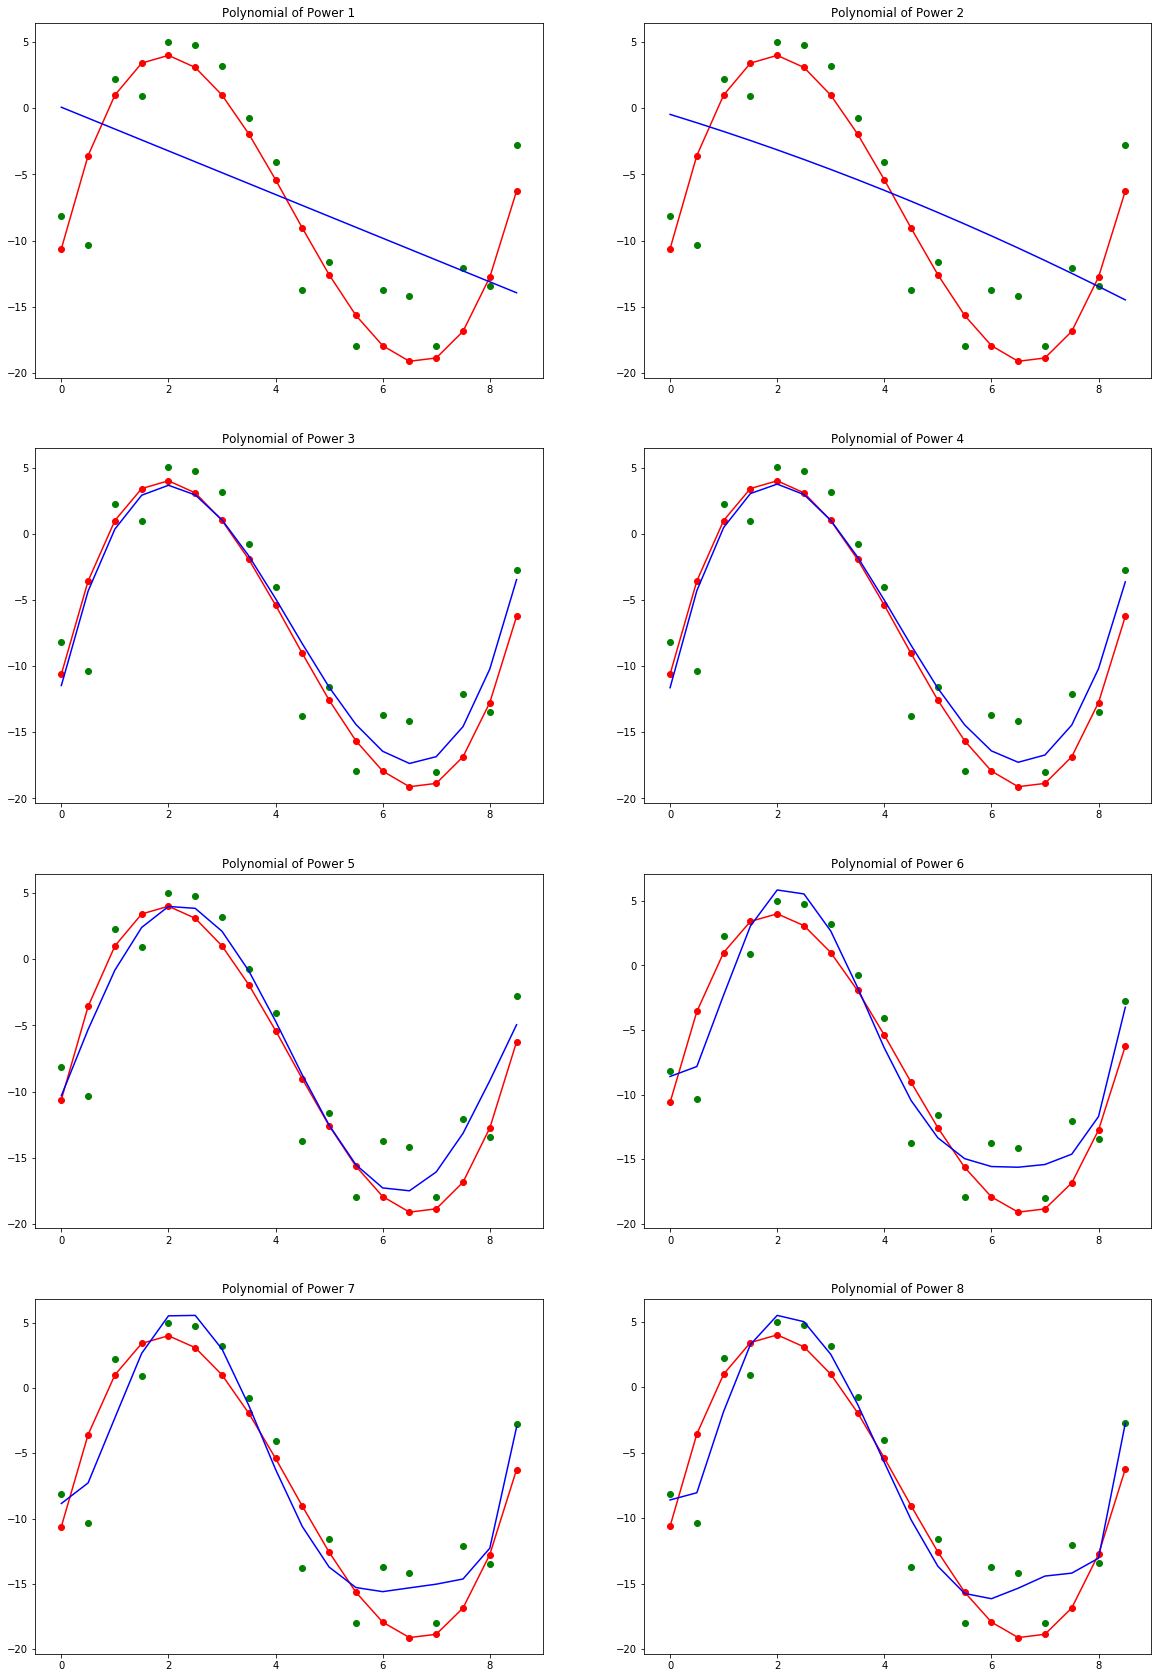

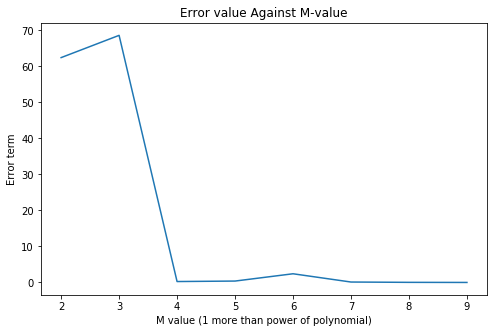

In [7]:
# Experiment with degrees

powers = range(2,10)
error_term = []
fig = plt.figure(figsize=(20,30))

for i in powers:
    
    # Compute variables
        # Make into a list, then reshape into matrices
    X_matrix_Mpwrs_list = []
    for j in range(i):
        for k in X_list:
            X_matrix_Mpwrs_list.append(k**j)
    X_matrix_Mpwrs_T =  np.array(X_matrix_Mpwrs_list).reshape(i,len(X))
    X_matrix_Mpwrs_T = np.matrix(X_matrix_Mpwrs_T)
    X_matrix_Mpwrs = np.transpose(X_matrix_Mpwrs_T)
    
    # Find w_hat
    w_hat_Mpwrs = np.dot(np.linalg.pinv(X_matrix_Mpwrs), Y_noise)

    # Extract coefficients and generate function
    coeff_Mpwrs = w_hat_Mpwrs.tolist()[0]
    estimation_Mpwrs = generate_graph(9, 0.5, i, coeff_Mpwrs)

    # Calculate error value
    error_term.append(float(error_value(estimation_Mpwrs[1], Y_noise)))
    
    # Plot polynomial graphs
    ax = fig.add_subplot(4,2,i-1)
    plt.title("Polynomial of Power {}".format(i-1))
    plt.scatter(X, Y, c ='r')
    plt.plot(X, Y, c = 'r')
    plt.scatter(X, Y_noise, c = 'g')
    plt.plot(estimation_Mpwrs[0], estimation_Mpwrs[1], c = 'b')
    
    
# Plot error to power plot
fig2 = plt.figure(figsize=(8,5))
plt.title("Error value Against M-value")
plt.xlabel("M value (1 more than power of polynomial)")
plt.ylabel("Error term")
plt.plot(range(2,10), error_term)

# Comments: At M=4 is when the error term has the steepest decrease, and this might be a tell for M=4 as ideal.
# For M<4, underfitting is obvious due to the large error term. 
# For M>4, overfitting is observed as there is no change in error term anymore

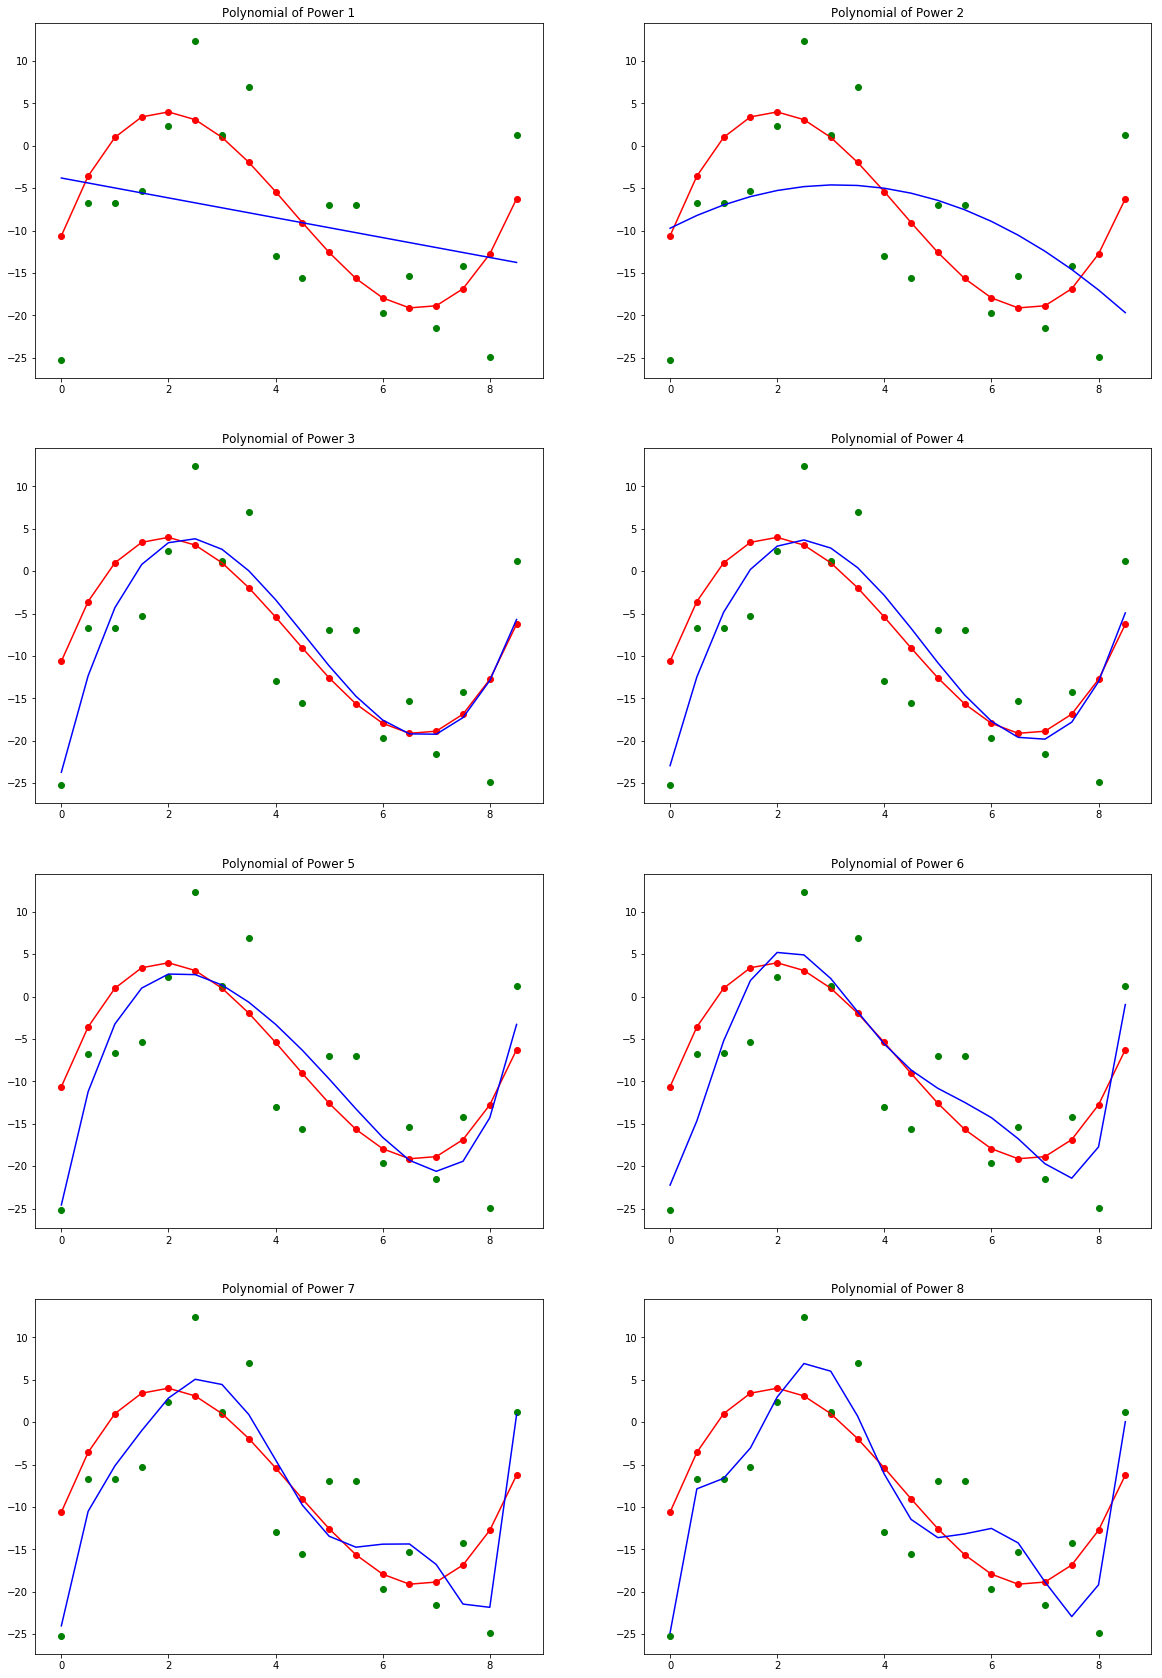

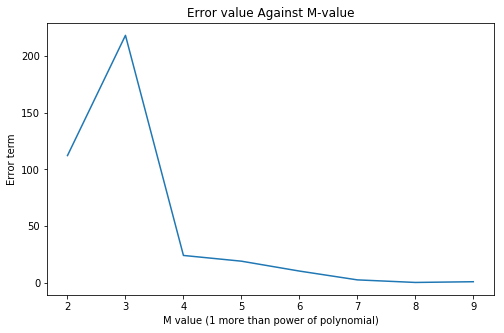

In [8]:
# Experimenting with Error Variance

Y_more_noise =  add_noise(8.0, actual_distribution[1]) #sigma is increased from 4 to 8

powers = range(2,10)
error_term = []
fig = plt.figure(figsize=(20,30))

for i in powers:
    
    # Compute variables
        # Make into a list, then reshape into matrices
    X_matrix_Mpwrs_list = []
    for j in range(i):
        for k in X_list:
            X_matrix_Mpwrs_list.append(k**j)
    X_matrix_Mpwrs_T =  np.array(X_matrix_Mpwrs_list).reshape(i,len(X))
    X_matrix_Mpwrs_T = np.matrix(X_matrix_Mpwrs_T)
    X_matrix_Mpwrs = np.transpose(X_matrix_Mpwrs_T)
    
    # Find w_hat
    w_hat_Mpwrs = np.dot(np.linalg.pinv(X_matrix_Mpwrs),Y_more_noise)

    # Extract coefficients and generate function
    coeff_Mpwrs = w_hat_Mpwrs.tolist()[0]
    estimation_Mpwrs = generate_graph(9, 0.5, i, coeff_Mpwrs)

    # Calculate error value
    error_term.append(float(error_value(estimation_Mpwrs[1], Y_more_noise)))
    
    # Plot polynomial graphs
    ax = fig.add_subplot(4,2,i-1)
    plt.title("Polynomial of Power {}".format(i-1))
    plt.scatter(X, Y, c ='r')
    plt.plot(X, Y, c = 'r')
    plt.scatter(X, Y_more_noise, c = 'g')
    plt.plot(estimation_Mpwrs[0], estimation_Mpwrs[1], c = 'b')
    
    
# Plot error to power plot
fig2 = plt.figure(figsize=(8,5))
plt.title("Error value Against M-value")
plt.xlabel("M value (1 more than power of polynomial)")
plt.ylabel("Error term")
plt.plot(range(2,10), error_term)

# Comments: Optimal M is still quite obvious from the steep drop in the error against M plot, but it is also noted that
# with greater variance in noise generated, the error sum for M=4 is greater here and the polynomials for higher power
# looks more erratic